# Title

**Exercise: A.2 - Multi-collinearity vs Model Predictions**

# Description

The goal of this exercise is to see how multi-collinearity can affect the predictions of a model.

For this, perform a multi-linear regression on the given dataset and compare the coefficients with those from simple linear regression of the individual predictors.

# Roadmap
- Read the dataset 'colinearity.csv' as a dataframe
- For each of the predictor variable, create a linear regression model with the same response variable
- Compute the coefficients for each model and store in a list.
- Fit all predictors using a separate multi-linear regression object
- Calculate the coefficients of each model
- Compare the coefficients of the multi-linear regression model with those of the simple linear regression model.

**DISCUSSION:** Why do you think the coefficients change and what does it mean? 

# Hints

<a href="https://scikit-learn.org/stable/index.html" target="_blank">LinearRegression()</a> : Returns a linear regression object from the sklearn library.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" target="_blank">LinearRegression().coef_</a> : This attribute returns the coefficient(s) of the linear regression object

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" target="_blank">sklearn.fit()</a> : Fit linear model

<a href="https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.Series.reshape.html" target="_blank">df.reshape()</a> : Return a ndarray with the values in the specified shape 

Note: This exercise is **auto-graded and you can try multiple attempts.**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from pprint import pprint
%matplotlib inline

In [2]:
# Read the file named "colinearity.csv"

df = pd.read_csv("colinearity.csv")

In [3]:
#Take a quick look at the dataset

df.head()

,x1,x2,x3,x4,y
0,-1.109823,-1.172554,-0.897949,-6.572526,-158.193913
1,0.288381,0.360526,2.298690,3.884887,198.312926
2,-1.059194,0.833067,0.285517,-1.225931,12.152087
3,0.226017,1.979367,0.744038,5.380823,190.281938
4,0.664165,-1.373739,0.317570,-0.437413,-72.681681


#### Creation of Linear Regression Objects

In [4]:
# Choose all the predictors as the variable 'X' (note capitalization of X for multiple features)

X = df.drop(['y'],axis=1)

# Choose the response variable 'y' for y values

y = df.y

In [5]:
### edTest(test_coeff) ###

# Here we create a dictionary that will store the Beta values of each linear regression model
linear_coef = []

for i in X:
    
    x = df[[i]]

    #Create a linear regression object
    linreg = LinearRegression()

    #Fit it with training values. 
    #Remember to choose only one column at a time as the predictor variable
    linreg.fit(x, y)
    
    # Add the coefficient value of the model to the list
    linear_coef.append(linreg.coef_)


### Multi-Linear Regression using all variables

In [6]:
# Here you must do a multi-linear regression with all predictors

# use sklearn library to define a new model 'multi_linear'
multi_linear = LinearRegression()

# Fit the multi-linear regression on all features and the response

multi_linear.fit(X, y)

# append the coefficients (plural) of the model to a variable multi_coef

multi_coef = multi_linear.coef_

#### Printing the individual $\beta$ values

In [7]:
# Run this command to see the beta values of the linear regression models

print('By simple(one variable) linear regression for each variable:', sep = '\n')

for i in range(4):
    
    pprint(f'Value of beta{i+1} = {linear_coef[i][0]:.2f}')

By simple(one variable) linear regression for each variable:
'Value of beta1 = 34.73'
'Value of beta2 = 68.63'
'Value of beta3 = 59.40'
'Value of beta4 = 20.92'


In [8]:
### edTest(test_multi_coeff) ###

#Now let's compare with the values from the multi-linear regression
print('By multi-Linear regression on all variables')
for i in range(4):
    pprint(f'Value of beta{i+1} = {round(multi_coef[i],2)}')

By multi-Linear regression on all variables
'Value of beta1 = -24.61'
'Value of beta2 = 27.72'
'Value of beta3 = 37.67'
'Value of beta4 = 19.27'


### Why do you think the $\beta$ values are different in the two cases?

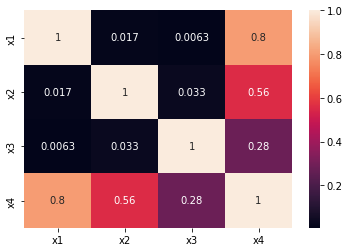

In [9]:
corrMatrix = df[['x1','x2','x3','x4']].corr() 
sns.heatmap(corrMatrix, annot=True) 
plt.show()